                                   CARDIOVASCULAR DISEASE PREDICTION
PROBLEM DESCRIPTION AND HOW MACHINE LEARNING CAN HELP

Cardiovascular diseases (CVDs) are among the leading causes of illness and death worldwide. Many of these conditions develop gradually and can be prevented if the risk is identified early. However, traditional risk assessment methods can be time-consuming and may rely heavily on a doctor's experience and manual evaluation of multiple health indicators such as age, blood pressure, cholesterol level, and lifestyle habits.


Machine Learning can analyze large amounts of patient health data and automatically learn patterns that indicate whether a person is at risk of developing cardiovascular disease. By training a model on past medical records, it can:

Predict risk levels accurately based on key health indicators.

Support doctors in making faster and more informed decisions.

Identify hidden patterns that may not be obvious in manual analysis.

Enable early intervention, which can improve patient outcomes and reduce healthcare costs.

In [1]:
!pip install xgboost
import xgboost as xgb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import sklearn
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sys


In [3]:
# System versions
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---" * 47)

# Libraries versions
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("xgboost version:", xgb.__version__)
print("sklearn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)


Platform: linux
Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:09:02) [GCC 11.2.0]
---------------------------------------------------------------------------------------------------------------------------------------------
matplotlib version: 3.10.0
seaborn version: 0.13.2
xgboost version: 2.1.1
sklearn version: 1.6.1
pandas version: 2.2.3
numpy version: 2.2.5


                                    DATA PREPARATION AND EXPLORATORY DATA ANALYSIS

In [4]:
df = pd.read_csv('cardiovascular_disease_cleaned(1).csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
#CHECKING FOR MISSING VALUES IN THE DATASET
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

| Column       | Full Name / Meaning                                                                                       |
| ------------ | --------------------------------------------------------------------------------------------------------- |
| **id**       | Patient ID (Identification Number)                                                                        |
| **age**      | Age of the patient (years)                                                                                |
| **sex**      | Sex of the patient (1 = male, 0 = female)                                                                 |
| **dataset**  | Dataset source identifier (used when multiple datasets are merged)                                        |
| **cp**       | Chest Pain Type (4 categories: typical angina, atypical angina, non-anginal pain, asymptomatic)           |
| **trestbps** | Resting Blood Pressure (mm Hg) measured upon hospital admission                                           |
| **chol**     | Serum Cholesterol level (mg/dl)                                                                           |
| **fbs**      | Fasting Blood Sugar (>120 mg/dl → 1 = true, 0 = false)                                                    |
| **restecg**  | Resting Electrocardiographic Results (0, 1, 2 categories)                                                 |
| **thalch**   | Maximum Heart Rate Achieved during exercise                                                               |
| **exang**    | Exercise-Induced Angina (1 = yes, 0 = no)                                                                 |
| **oldpeak**  | ST Depression induced by exercise relative to rest                                                        |
| **slope**    | Slope of the Peak Exercise ST segment (0 = up, 1 = flat, 2 = down)                                        |
| **ca**       | Number of Major Vessels Colored by Fluoroscopy (0–3)                                                      |
| **thal**     | Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)                                         |
| **num**      | Target variable: Heart disease status (0–4 in raw data, usually converted to 0 = no disease, 1 = disease) |


In [7]:
df.num = df.num.astype('object')
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num          object
dtype: object

In [8]:
df.describe().round(3)

,id,age,trestbps,chol,thalch,oldpeak,ca
count,919.000,919.000,919.000,919.000,919.000,919.000,919.000
mean,460.181,53.509,132.705,200.791,136.816,0.973,0.502
std,265.693,9.430,18.070,109.214,25.371,1.120,0.786
min,1.000,28.000,80.000,0.000,60.000,-2.600,0.000
25%,230.500,47.000,120.000,178.500,120.000,0.000,0.000
50%,460.000,54.000,130.000,224.000,138.000,0.800,0.000
75%,689.500,60.000,141.210,268.000,156.000,1.900,1.000
max,920.000,77.000,200.000,603.000,202.000,6.200,3.000


In [9]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.num = df.num.astype('object')
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num          object
dtype: object

In [10]:
df.num.max()


1

In [11]:
numerical = list(df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index)
categorical = list(df.dtypes[df.dtypes=='object'].index)
numerical, categorical

(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],
 ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal', 'num'])

In [12]:
df['sex'] = df['sex'].replace({'Male':1,'Female':0})
df['sex'].value_counts()

/tmp/ipykernel_10262/1030529256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male':1,'Female':0})


sex
1    725
0    194
Name: count, dtype: int64

                  VISUALIZATION OF PATTERNS

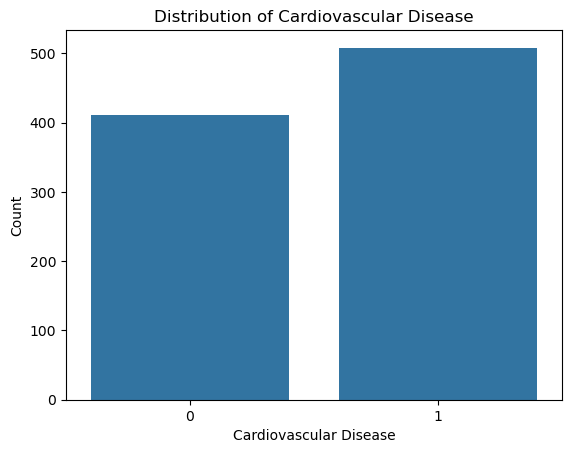

In [13]:
sns.countplot(x='num', data=df)
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

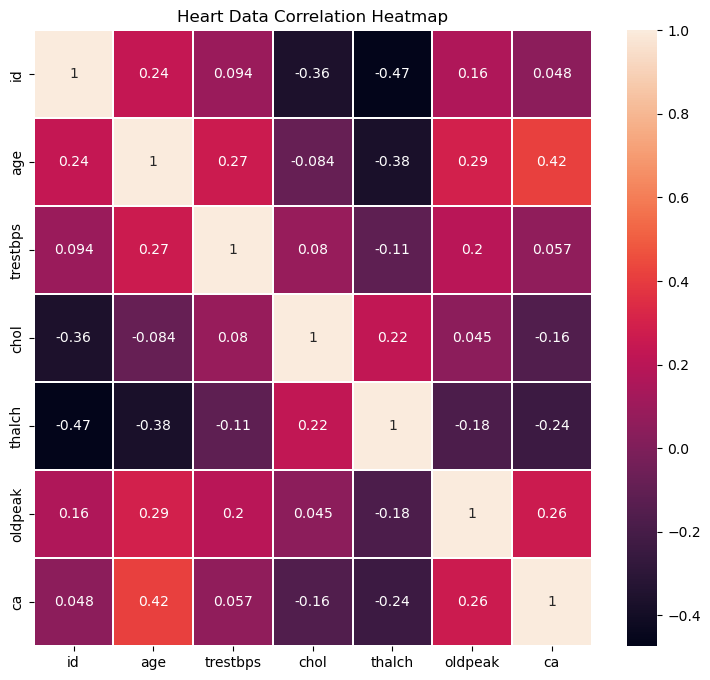

In [14]:
plt.figure(figsize = (9,8))
plt.title("Heart Data Correlation Heatmap")
sns.heatmap(df[numerical].corr(), annot = True, linewidths = .1);

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: >, <Axes: >]], dtype=object)

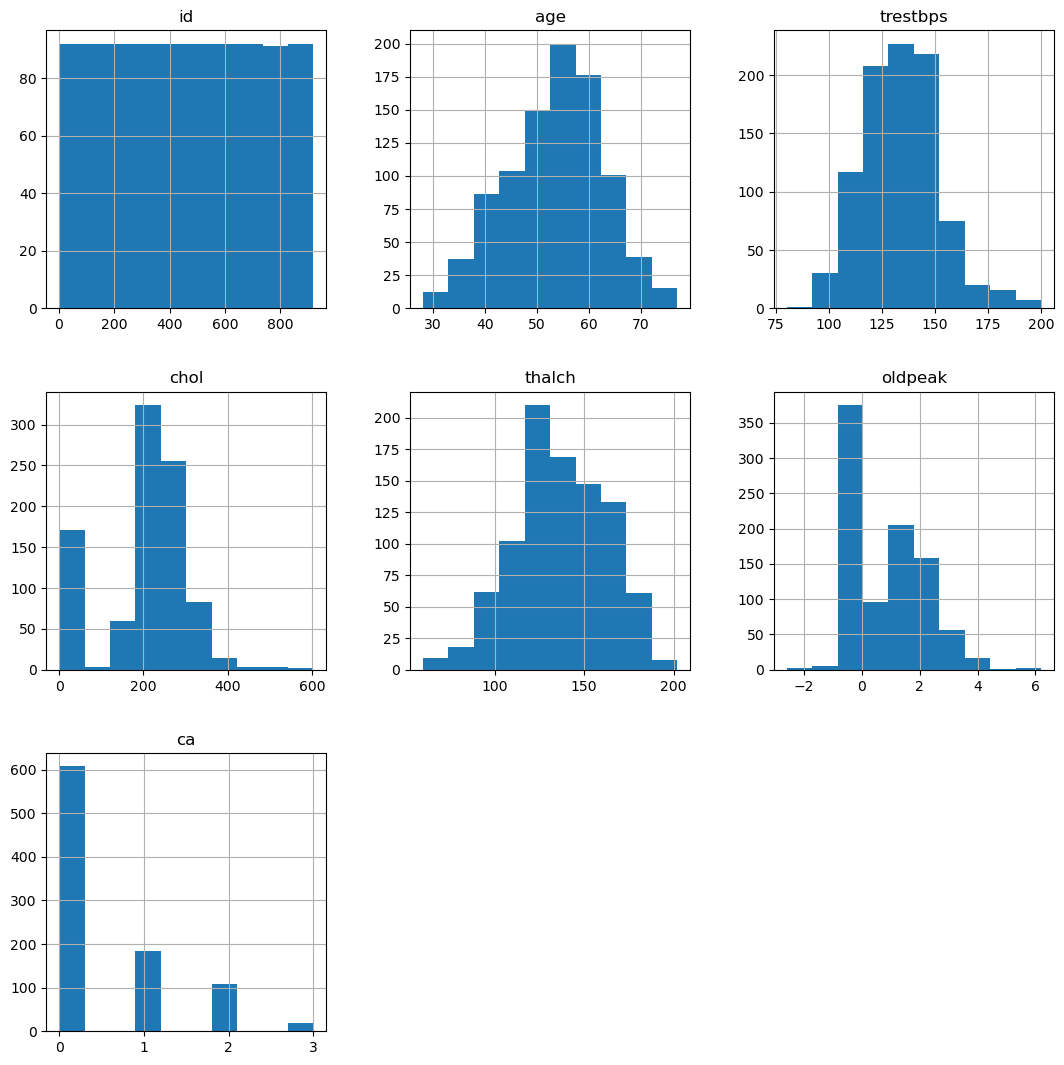

In [15]:
df[numerical].hist(figsize = (13, 13))

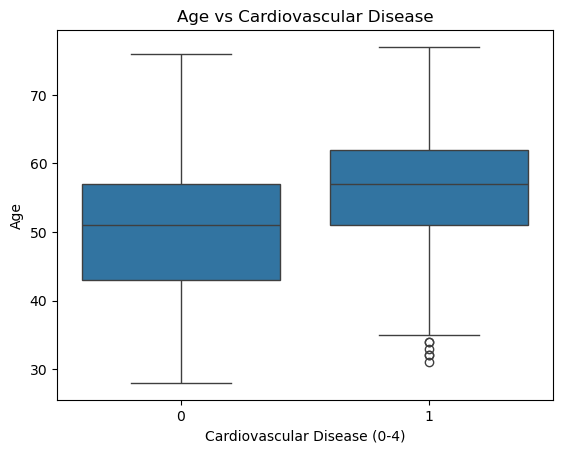

In [16]:
# VISUALIZE CONTINOUS VARIABLE VS TARGET VARIABLE
sns.boxplot(x='num', y='age', data=df)
plt.title('Age vs Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0-4)')
plt.ylabel('Age')
plt.show()

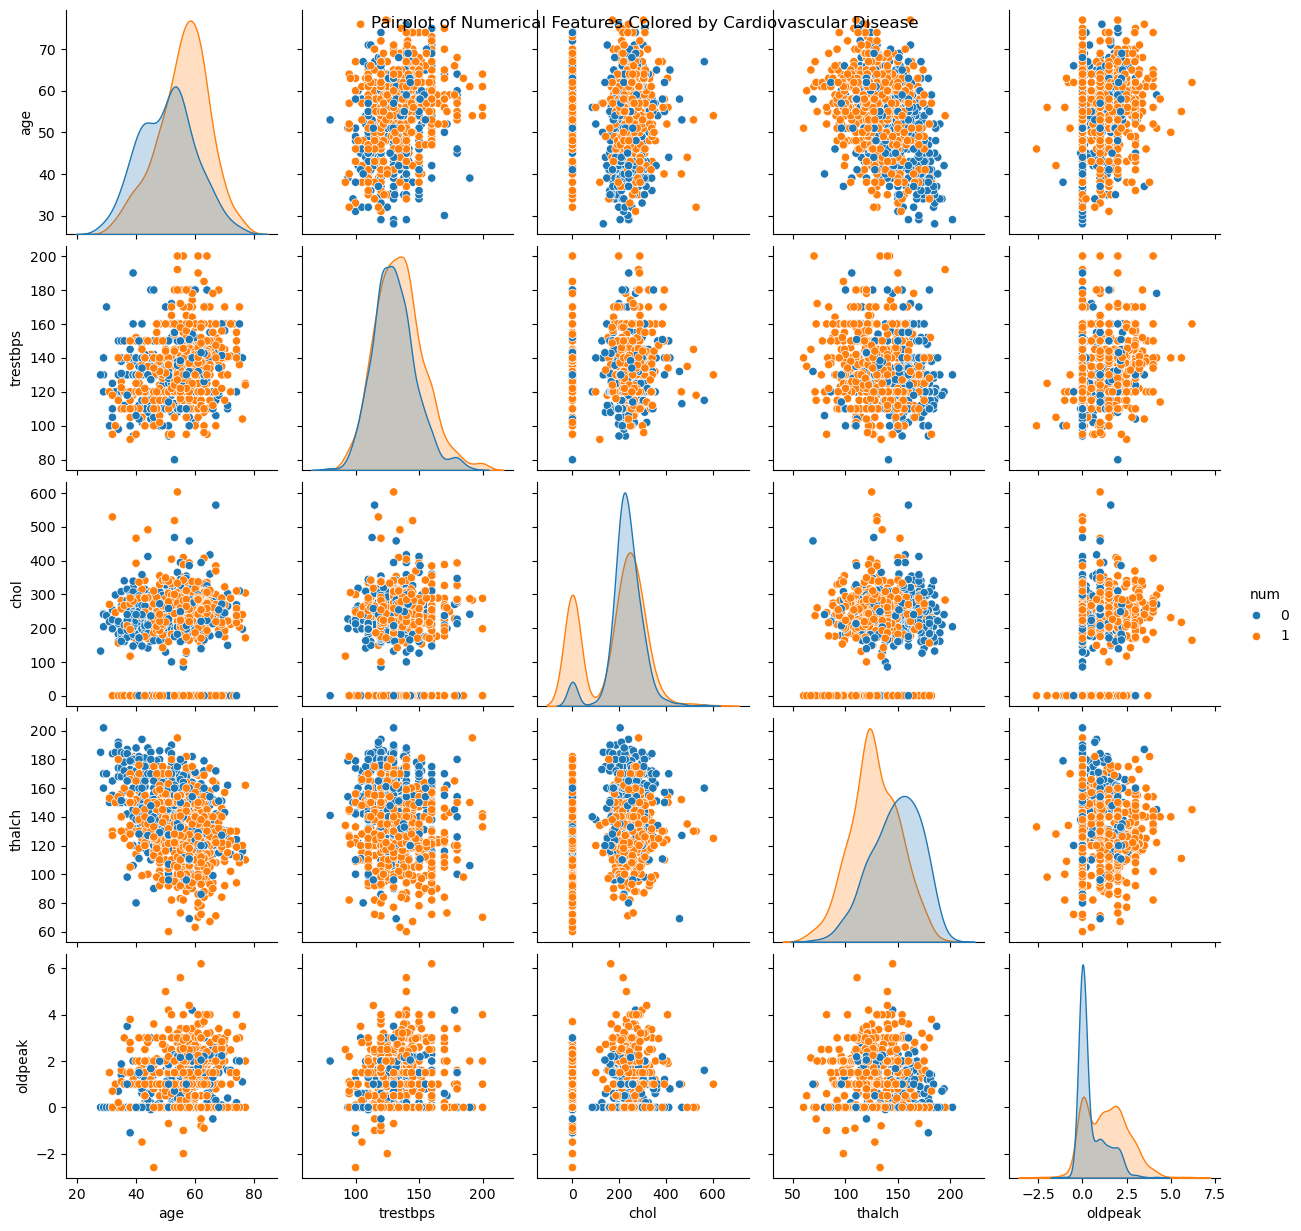

In [17]:
sns.pairplot(df, hue='num', vars=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'])
plt.suptitle('Pairplot of Numerical Features Colored by Cardiovascular Disease')
plt.show()

In [18]:
df.num = df.num.astype('int')

     SPLITTING THE DATA INTO TRAIN /VALIDATION/ TEST-SPLIT

     We will split it into 60% 20% 20% distribution

In [19]:
 #splitting the dataset into train,val and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [20]:
#check fo the length of the datasets
len(df_train), len(df_val), len(df_test)

(551, 184, 184)

In [21]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)    

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,73,62,1,Cleveland,asymptomatic,120.00,267.0,False,normal,99.0,True,1.8,flat,2.0,reversable defect,1
1,121,48,1,Cleveland,asymptomatic,130.00,256.0,True,lv hypertrophy,150.0,True,0.0,upsloping,2.0,reversable defect,1
2,297,59,1,Cleveland,asymptomatic,164.00,176.0,True,lv hypertrophy,90.0,False,1.0,flat,2.0,fixed defect,1
3,315,34,1,Hungary,atypical angina,98.00,220.0,False,normal,150.0,False,0.0,upsloping,0.0,normal,0
4,711,67,1,Switzerland,typical angina,145.00,0.0,False,lv hypertrophy,125.0,False,0.0,flat,2.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,98,60,0,Cleveland,asymptomatic,150.00,258.0,False,lv hypertrophy,157.0,False,2.6,flat,2.0,reversable defect,1
180,214,66,0,Cleveland,asymptomatic,178.00,228.0,True,normal,165.0,True,1.0,flat,2.0,reversable defect,1
181,276,64,1,Cleveland,typical angina,170.00,227.0,False,lv hypertrophy,155.0,False,0.6,flat,0.0,reversable defect,0
182,586,47,0,Hungary,asymptomatic,120.00,205.0,False,normal,98.0,True,2.0,flat,0.0,fixed defect,1


In [22]:
y_train = df_train.num.values
y_val = df_val.num.values
y_test = df_test.num.values

In [23]:
# Drop `target` from our data sets
del df_train["num"]
del df_test["num"]
del df_val["num"]


PERFORMING ONE HOT ENCODING BEFORE WE TRAIN OUR DATA

In [24]:
train_dicts = df_train.to_dict(orient = 'records')
dv= DictVectorizer(sparse = False) 
X_train = dv.fit_transform(train_dicts)

In [25]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model

LogisticRegression(max_iter=1000)

In [26]:
model.fit(X_train,y_train)

/home/brandonotieno/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
val_dicts = df_val.to_dict(orient = 'records')

X_val = dv.transform(val_dicts)

In [28]:
test_dicts = df_test.to_dict(orient = 'records')
X_test = dv.transform(test_dicts)

          TRAIN SEVERAL MODELS AND THEN DO FINE TUNING

TRAINING A LOGISTIC REGRESSION MODEL WITH SCIKIT-LEARN

In [29]:
model.coef_

array([[-2.67618893e-02,  1.53447411e+00, -1.03050467e-05,
         8.22175934e-01, -6.48651985e-01, -7.11432223e-01,
        -3.43662787e-01,  9.43468698e-01, -4.60151671e-01,
         8.86028203e-01, -2.25091629e+00,  8.25354007e-01,
        -1.14268258e-01,  5.46626610e-03,  3.43702228e-01,
        -1.74979818e-01, -2.97731664e-01, -4.08859579e-01,
         3.07611553e-01,  5.07284354e-01, -2.33573043e-01,
        -1.15528237e+00,  4.83893868e-01, -1.29909014e+00,
        -6.63747910e-02,  1.24583415e-03,  3.72083197e-03]])

In [30]:
model.coef_[0].round(3)

array([-2.700e-02,  1.534e+00, -0.000e+00,  8.220e-01, -6.490e-01,
       -7.110e-01, -3.440e-01,  9.430e-01, -4.600e-01,  8.860e-01,
       -2.251e+00,  8.250e-01, -1.140e-01,  5.000e-03,  3.440e-01,
       -1.750e-01, -2.980e-01, -4.090e-01,  3.080e-01,  5.070e-01,
       -2.340e-01, -1.155e+00,  4.840e-01, -1.299e+00, -6.600e-02,
        1.000e-03,  4.000e-03])

In [31]:
model.intercept_

array([-1.60779056])

In [32]:
model.intercept_[0]

np.float64(-1.607790562763853)

In [33]:
model.fit(X_train,y_train)


/home/brandonotieno/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
model.predict_proba(X_test).round(2)

array([[0.02, 0.98],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.03, 0.97],
       [0.13, 0.87],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.95, 0.05],
       [0.41, 0.59],
       [0.67, 0.33],
       [0.99, 0.01],
       [0.39, 0.61],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.91, 0.09],
       [0.98, 0.02],
       [0.78, 0.22],
       [0.74, 0.26],
       [0.97, 0.03],
       [0.46, 0.54],
       [0.01, 0.99],
       [0.91, 0.09],
       [0.54, 0.46],
       [0.97, 0.03],
       [0.54, 0.46],
       [0.37, 0.63],
       [0.86, 0.14],
       [0.1 , 0.9 ],
       [0.45, 0.55],
       [0.97, 0.03],
       [0.13, 0.87],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.66, 0.34],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.27, 0.73],
       [0.83,

In [35]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1])

In [36]:
reg_params = [0.01, 0.1, 1, 2, 10, 100]
reg_params_scores = []
for param in reg_params:
    model = LogisticRegression(solver = 'liblinear', C = param,max_iter = 1000, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)    
    param_score = 100 * (y_pred == y_val).mean()

    reg_params_scores += [round(param_score, 3)]
param_scores = pd.Series(reg_params_scores, index = reg_params, name = "parameters_scores")
param_scores


0.01      82.609
0.10      86.413
1.00      87.500
2.00      86.957
10.00     86.957
100.00    86.413
Name: parameters_scores, dtype: float64

In [37]:
#LogisticRegression MODEL HAS AN ACCURACY OF 87.5%

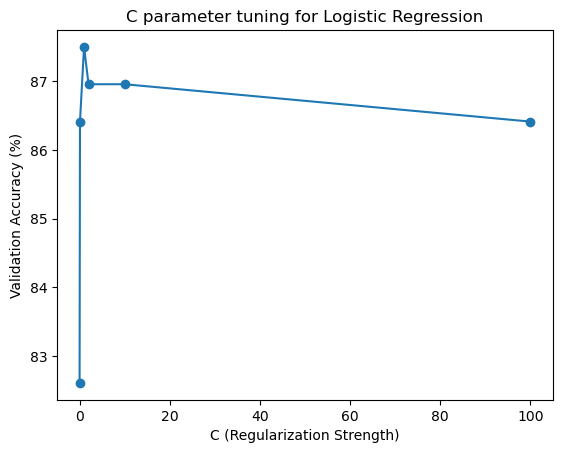

In [38]:
param_scores.plot(marker='o')
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Validation Accuracy (%)")
plt.title("C parameter tuning for Logistic Regression")
plt.show()

In [39]:
X = df.drop('num', axis=1)  # features
y = df['num']               # target


In [40]:
print(X.shape)
print(y.value_counts())



(919, 15)
num
1    508
0    411
Name: count, dtype: int64


TRAINING A DECISION TREEE CLASSIFFIER

In [41]:


depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth, random_state =42)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict(X_val)
    acc=100 *(y_pred ==y_val).mean()
     
    print('%4s -> %.3f' % (depth, acc))

   1 -> 79.348
   2 -> 85.326
   3 -> 86.957
   4 -> 84.239
   5 -> 83.152
   6 -> 83.696
  10 -> 83.152
  15 -> 81.522
  20 -> 81.522
None -> 81.522


In [42]:
from sklearn.metrics import roc_auc_score


scores = []
 
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.820690
1,4,2,0.830557
2,4,5,0.898736
3,4,10,0.946000
4,4,15,0.944464


In [43]:

# index - rows
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.821  0.826  0.815
2                 0.831  0.846  0.837
5                 0.899  0.914  0.909
10                0.946  0.948  0.945
15                0.944  0.944  0.944
20                0.948  0.948  0.948
100               0.876  0.876  0.876
200               0.793  0.793  0.793
500               0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

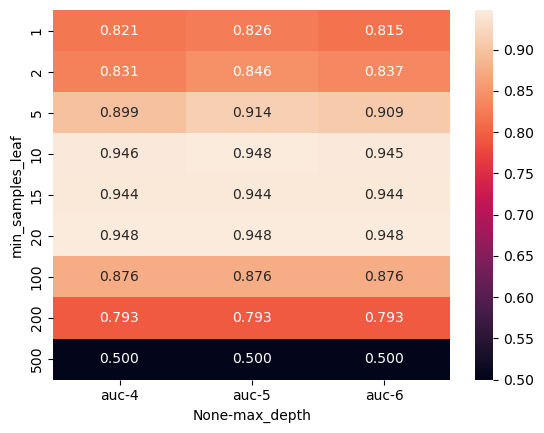

In [44]:
	
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [45]:
# IT has min_sample_leaf  = 10-20  max_depth 6  and accuracy of 94.8%

RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
 
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
 
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

In [47]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    scores.append((n, auc))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.948363
1,20,0.953326
2,30,0.960475
3,40,0.960002
4,50,0.963724
5,60,0.963429
6,70,0.963843
7,80,0.963665
8,90,0.964256
9,100,0.964552


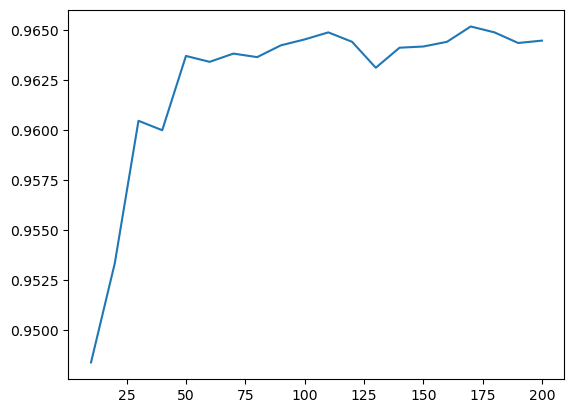

In [48]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [49]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [50]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.groupby("max_depth")["auc"].mean().round(4)

max_depth
5     0.9577
10    0.9617
15    0.9628
Name: auc, dtype: float64

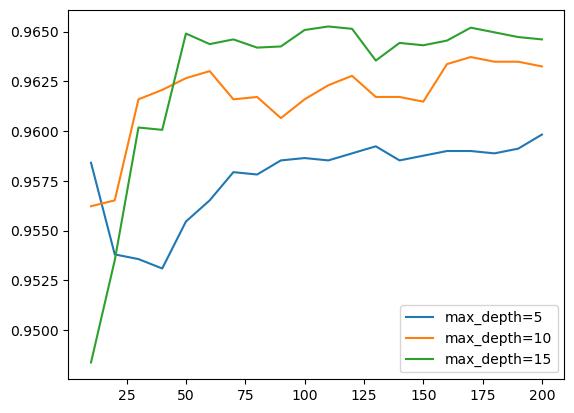

In [51]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()


In [52]:
max_depth = 15

In [53]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))


In [54]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

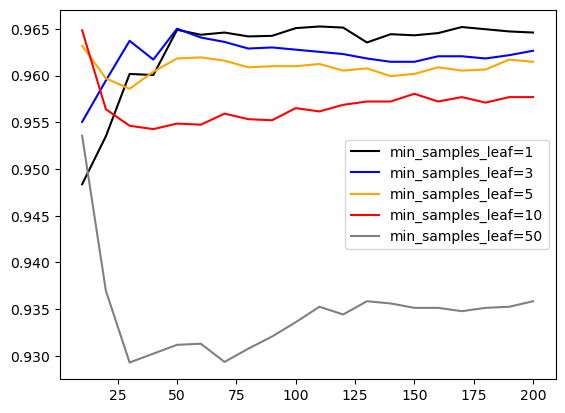

In [55]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [56]:
min_samples_leaf = 1

In [57]:
f = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf= min_samples_leaf,
                            random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=200,
                       random_state=1)

In [58]:
#    RANDOFORESTCLASSIFIER  HAS AN ACCURACY OF   96.5201%

XGBoost Classifier

In [59]:
import xgboost as xgb
print(xgb.__version__)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, "train"), (dval, "eval")]



2.1.1


In [60]:
xgb_params = {
    'eta' :0.3,
    'max_depth' :6,
    'min_child_weight' :1,
    'objective' : 'binary:logistic',
    'nthread' :8,

    'seed' :1,
    'verbosity' :1,
}

model = xgb.train(xgb_params,dtrain, num_boost_round=10)

In [61]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.956516601677892)

In [62]:
#performance monitoring
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [63]:
xgb_params = {
    'eta' :0.3,
    'max_depth' :6,
    'min_child_weight' :1,
    'objective' : 'binary:logistic',
    'nthread' :8,
    'seed' :1,
    'verbosity' :1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-logloss:0.49937	val-logloss:0.53993
[1]	train-logloss:0.39090	val-logloss:0.44934


[2]	train-logloss:0.31095	val-logloss:0.38633
[3]	train-logloss:0.25690	val-logloss:0.35680
[4]	train-logloss:0.21619	val-logloss:0.32268
[5]	train-logloss:0.18531	val-logloss:0.30469
[6]	train-logloss:0.16309	val-logloss:0.29264
[7]	train-logloss:0.14523	val-logloss:0.27913
[8]	train-logloss:0.13010	val-logloss:0.26854
[9]	train-logloss:0.11588	val-logloss:0.27227
[10]	train-logloss:0.10553	val-logloss:0.27625
[11]	train-logloss:0.09579	val-logloss:0.27786
[12]	train-logloss:0.08836	val-logloss:0.27704
[13]	train-logloss:0.08127	val-logloss:0.27856
[14]	train-logloss:0.07559	val-logloss:0.28186
[15]	train-logloss:0.07015	val-logloss:0.28173
[16]	train-logloss:0.06548	val-logloss:0.28100
[17]	train-logloss:0.06186	val-logloss:0.27995
[18]	train-logloss:0.05767	val-logloss:0.28129
[19]	train-logloss:0.05495	val-logloss:0.28428
[20]	train-logloss:0.05185	val-logloss:0.28695
[21]	train-logloss:0.04944	val-logloss:0.28977
[22]	train-logloss:0.04765	val-logloss:0.28999
[23]	train-logloss:0.

In [64]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.944936783646461)

In [65]:
#XGBOOST HAS AN AACURACY OF 95.6516%

PICKING THE BEST MODEL

We will pick  RANDOM FOREST CLASSIFIER because it has an accuracy of  96.5201%

SAVING THE MODEL

In [66]:
import pickle


In [67]:
output_file = 'Random_Forest_Model.bin'
output_file

'Random_Forest_Model.bin'

In [68]:
f_out = open(output_file, 'wb')
 
pickle.dump((dv, rf), f_out)
 
f_out.close()

In [69]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, rf), f_out)


In [70]:
input_file = 'Random_Forest_Model.bin'


with open(input_file,'rb') as f_in:
    
    dv, rf = pickle.load(f_in)

rf


RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=200,
                       random_state=1)

In [ ]:
import pandas as pd

# patient dictionary
patient = {'age': 67,
           'sex': 'male',
           'cp': 'asymptomatic',
           'trestbps': 145.0,
           'chol': 233.0,
           'fbs': 'low_fbs',
           'restecg': 'lv hypertrophy',
           'thalachh': 112.0,
           'exang': 'no',
           'oldpeak': 2.7,
           'slope': 'upsloping',
           'ca': 'no_vessel',
           'thal': 'reversal_defect'}

# Convert to DataFrame
patient_df = pd.DataFrame([patient])

# Transform features using the loaded encoder
X_patient = dv.transform(patient_df.to_dict(orient='records'))

# Make prediction
pred_class = rf.predict(X_patient)[0]
pred_prob = rf.predict_proba(X_patient)[0, 1]  # probability of positive class

# Display input and results
print("Patient information:")
display(patient_df)

print(f"Predicted class: {pred_class}")
print(f"Predicted probability of disease: {pred_prob:.2f}")

# Define treatment if necessary
if pred_class == 1:
    print("Treatment plan should be considered for this patient.")


Patient information:


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,67,male,asymptomatic,145.0,233.0,low_fbs,lv hypertrophy,112.0,no,2.7,upsloping,no_vessel,reversal_defect


Predicted class: 0
Predicted probability of disease: 0.48


: 